In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# load analysis-64b.csv and analysis-96b.csv
df_64 = pd.read_csv("analysis-64b.csv").reset_index(drop=True)
df_96 = pd.read_csv("analysis-96b.csv").reset_index(drop=True)
df_64

,Unnamed: 0,n_elements,loss_angular_vals
0,0,10.0,2.623044
1,1,11.0,2.682388
2,2,13.0,2.954562
3,3,14.0,1.868329
4,4,14.0,1.479355
...,...,...,...
511995,511995,64.0,2.893788
511996,511996,64.0,0.048406
511997,511997,64.0,0.286353
511998,511998,64.0,0.171110


In [11]:
df_64['n_elements'] = df_64['n_elements'].astype(int)
# group by n_elements and calculate the mean and std / count of the loss_angular_vals
df_64_agg = df_64.groupby('n_elements').agg({'loss_angular_vals': ['mean', 'std', 'count']}).reset_index()

In [12]:
df_96['n_elements'] = df_96['n_elements'].astype(int)
# group by n_elements and calculate the mean and std / count of the loss_angular_vals
df_96_agg = df_96.groupby('n_elements').agg({'loss_angular_vals': ['mean', 'std', 'count']}).reset_index()

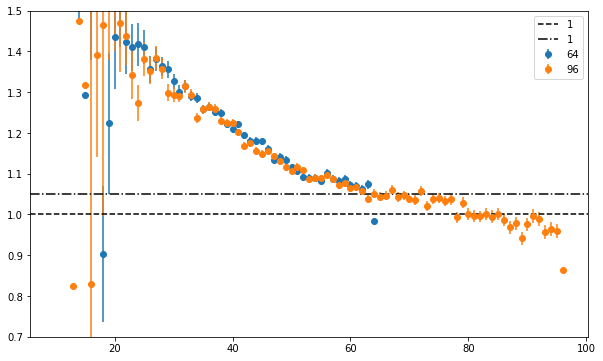

In [13]:
# plot the mean and std of the loss_angular_vals as a function of n_elements
plt.figure(figsize=(10, 6))

plt.errorbar(df_64_agg['n_elements'], df_64_agg['loss_angular_vals']['mean'], yerr=df_64_agg['loss_angular_vals']['std'] / np.sqrt(df_64_agg['loss_angular_vals']['count']), fmt='o', label='64')
plt.errorbar(df_96_agg['n_elements'], df_96_agg['loss_angular_vals']['mean'], yerr=df_96_agg['loss_angular_vals']['std'] / np.sqrt(df_96_agg['loss_angular_vals']['count']), fmt='o', label='96')


# put horizontal line at 1
plt.axhline(1, color='k', linestyle='--', label='1')
plt.axhline(1.05, color='k', linestyle='-.', label='1')


plt.ylim(0.7, 1.5)
plt.legend(loc="best")

In [14]:
np.average(df_64["loss_angular_vals"]), np.average(df_96["loss_angular_vals"])

(1.0702443957963819, 1.0502000858133431)

In [15]:
import numpy as np

# define the data
x = np.array([64, 96])
y = np.array([1.06772816368189, 1.0486524521148568])

# fit a linear function to the data
coeffs = np.polyfit(x, y, 1)

# print the coefficients of the linear function
print('Slope: {:.6f}'.format(coeffs[0]))
print('Intercept: {:.6f}'.format(coeffs[1]))




Slope: -0.000596
Intercept: 1.105880


In [16]:
# find for which x the y=1
x = (1 - 1.090352) / -0.000343
print('x = {:.2f}'.format(x))


x = 263.42
